In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banudatabreast/data.csv


In [2]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("../input/banudatabreast/data.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# remove unnamed column

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
df.shape

(569, 32)

In [10]:
# count the number of empty (NaN, NAN, na) values in each column
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [11]:
# drop the column with all missing values
df = df.dropna(axis=1)
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [12]:
# get the new count of the number of rows and columns in the data set
print(df.shape)

(569, 32)


In [13]:
# get a count of the number of Malignant (M) or Benign (B) cells
print(df['diagnosis'].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

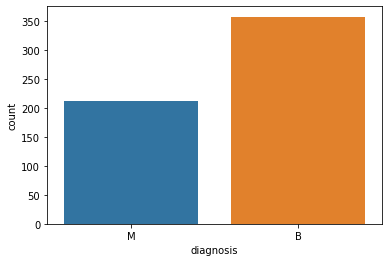

In [14]:
# visualize the count
sns.countplot(df['diagnosis'],label="Count")

In [15]:

# look at the data types to see which columns need to be transformed / encoded to a number
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [16]:
# Encoding categorical data values (Transforming categorical data into numbers)
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1]= labelencoder_Y.fit_transform(df.iloc[:,1].values)
print(df.iloc[:,1].head())

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


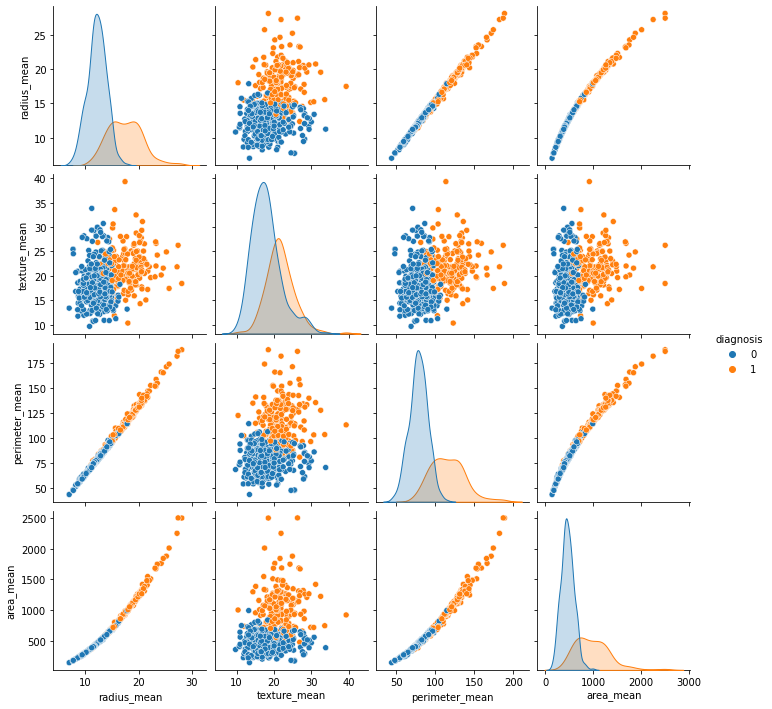

In [17]:
# create a pair plot
sns.pairplot(df.iloc[:,1:6], hue="diagnosis")

In [18]:
# print the first 5 rows of new data set
print(df.head(5))

         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  ar

In [19]:
# get the correlation of the columns
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


<AxesSubplot:>

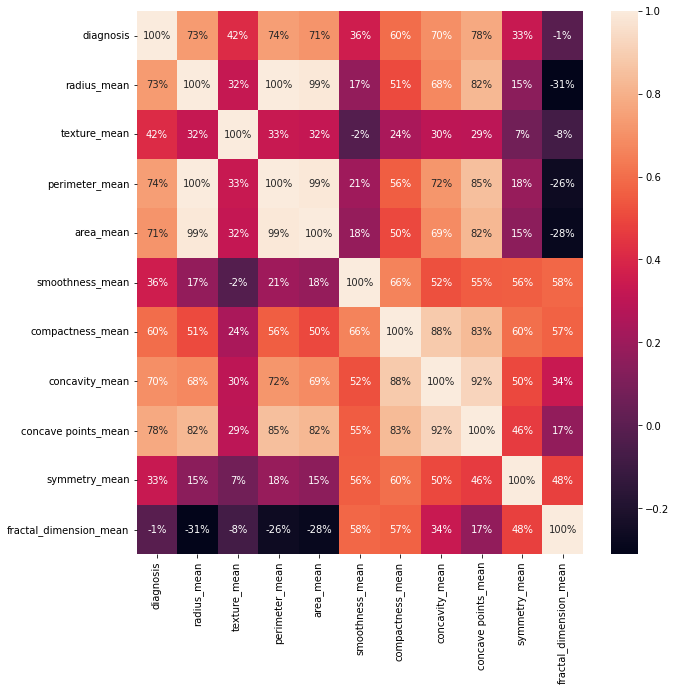

In [20]:
# visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt='.0%')

In [21]:
# # split the data set into independent (X) and dependent (Y) data sets
# X = df.iloc[:, 2:31].values
# Y = df.iloc[:, 1].values

In [22]:
#determining X and y values
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [23]:
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [25]:
X.size, y.size

(17639, 569)

In [26]:
X.shape,y.shape

((569, 31), (569,))

In [27]:
# split the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 31), (143, 31), (426,), (143,))

In [29]:
X_train.size, X_test.size, y_train.size, y_test.size

(13206, 4433, 426, 143)

In [30]:
# scale the data (feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
X_train

array([[-0.23086619, -0.65079907, -0.43057322, ..., -0.36433881,
         0.32349851, -0.7578486 ],
       [-0.23082222, -0.82835341,  0.15226547, ..., -1.45036679,
         0.62563098, -1.03071387],
       [-0.23058288,  1.68277234,  2.18977235, ...,  0.72504581,
        -0.51329768, -0.96601386],
       ...,
       [ 7.05970021, -1.33114223, -0.22172269, ..., -0.98806491,
        -0.69995543, -0.12266325],
       [-0.23100067, -1.25110186, -0.24600763, ..., -1.75887319,
        -1.56206114, -1.00989735],
       [-0.23059415, -0.74662205,  1.14066273, ..., -0.2860679 ,
        -1.24094654,  0.2126516 ]])

In [32]:
X_test

array([[-0.2306719 , -0.21395901,  0.3125461 , ...,  1.37043754,
         1.08911166,  1.53928319],
       [-0.16428419, -0.26750714,  1.461224  , ..., -0.84266106,
        -0.71577388, -0.88105993],
       [-0.23072277, -0.03922298, -0.86770223, ..., -0.505318  ,
        -1.20298225, -0.92494342],
       ...,
       [ 0.50554255, -0.51270124, -1.69096186, ..., -0.12632201,
         0.33773512, -0.42872244],
       [-0.16834794, -0.17732081, -2.01395163, ..., -0.62875108,
        -0.29500302, -0.65432858],
       [-0.23103224,  1.5305829 , -0.26300709, ...,  1.6694843 ,
         1.18085869,  0.48889253]])

In [33]:
#creating the model

In [34]:
# create a function for the models
def models(X_train,y_train):

        # Using Logistic Regression Algorithm to the Training Set
        from sklearn.linear_model import LogisticRegression
        log = LogisticRegression(random_state = 0)
        log.fit(X_train, y_train)

        # Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
        from sklearn.neighbors import KNeighborsClassifier
        knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
        knn.fit(X_train, y_train)

        # Using SVC method of svm class to use Support Vector Machine Algorithm
        from sklearn.svm import SVC
        svc_lin = SVC(kernel = 'linear', random_state = 0)
        svc_lin.fit(X_train, y_train)

        # Using SVC method of svm class to use Kernel SVM Algorithm
        from sklearn.svm import SVC
        svc_rbf = SVC(kernel = 'rbf', random_state = 0)
        svc_rbf.fit(X_train, y_train)

        # Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
        from sklearn.naive_bayes import GaussianNB
        gauss = GaussianNB()
        gauss.fit(X_train, y_train)

        # Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
        from sklearn.tree import DecisionTreeClassifier
        tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
        tree.fit(X_train, y_train)

        # Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
        from sklearn.ensemble import RandomForestClassifier
        forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
        forest.fit(X_train, y_train)

        # print the training accuracy for each algorithm
        print(f'[0]Logistic Regression Training Accuracy:%.2f'% log.score(X_train, y_train))
        print(f'[1]K Nearest Neighbor Training Accuracy :%.2f'% knn.score(X_train, y_train))
        print(f'[2]Support Vector Machine (Linear Classifier) Training Accuracy:%.2f'% svc_lin.score(X_train, y_train))
        print(f'[3]Support Vector Machine (RBF Classifier) Training Accuracy: %.2f'% svc_rbf.score(X_train, y_train))
        print(f'[4]Gaussian Naive Bayes Training Accuracy: %.2f'% gauss.score(X_train, y_train))
        print(f'[5]Decision Tree Classifier Training Accuracy: %.2f'%tree.score(X_train, y_train))

        return log, knn, svc_lin, svc_rbf, gauss, tree, forest

# get and train all of the models
model = models(X_train,y_train)

[0]Logistic Regression Training Accuracy:0.99
[1]K Nearest Neighbor Training Accuracy :0.97
[2]Support Vector Machine (Linear Classifier) Training Accuracy:0.99
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.98
[4]Gaussian Naive Bayes Training Accuracy: 0.95
[5]Decision Tree Classifier Training Accuracy: 1.00


In [35]:
# show the confusion matrix and accuracy for all of the models on the test data
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
        cm = confusion_matrix(y_test, model[i].predict(X_test))

        #extracting TN, FP, FN, TP
        TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(X_test)).ravel()

        test_score = (TP + TN) / (TP + TN + FN + FP)

        print("confusion_matrix\n",cm,'\n')
        print('Model[{}] Testing Accuracy = "{:f}!"'.format(i, test_score))
        print()

confusion_matrix
 [[87  3]
 [ 3 50]] 

Model[0] Testing Accuracy = "0.958042!"

confusion_matrix
 [[89  1]
 [ 6 47]] 

Model[1] Testing Accuracy = "0.951049!"

confusion_matrix
 [[84  6]
 [ 3 50]] 

Model[2] Testing Accuracy = "0.937063!"

confusion_matrix
 [[87  3]
 [ 3 50]] 

Model[3] Testing Accuracy = "0.958042!"

confusion_matrix
 [[84  6]
 [ 6 47]] 

Model[4] Testing Accuracy = "0.916084!"

confusion_matrix
 [[85  5]
 [ 2 51]] 

Model[5] Testing Accuracy = "0.951049!"

confusion_matrix
 [[90  0]
 [ 2 51]] 

Model[6] Testing Accuracy = "0.986014!"



In [36]:
# show another way to get the models accuracy on the test data
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
        print('Model ',i)
        print('######'*9)
        
        #Check precision, recall, f1-score
        print("This is classification_report\n", classification_report(y_test, model[i].predict(X_test)) )
        print('______'*9)
        #Another way to get the models accuracy on the test data
        print('This is accuracy_score %.2f'% accuracy_score(y_test, model[i].predict(X_test)))
        print()

Model  0
######################################################
This is classification_report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        90
           1       0.94      0.94      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

______________________________________________________
This is accuracy_score 0.96

Model  1
######################################################
This is classification_report
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        90
           1       0.98      0.89      0.93        53

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

______________________________________________________
This is accuracy_

In [37]:
# print the prediction of the random forest classifier model
pred = model[6].predict(X_test)
print(pred)
print()


[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]



In [38]:

# create a pickle file using serialization
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(model[6], pickle_out)
pickle_out.close()

In [39]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model[6], open(filename, 'wb'))

In [40]:

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

print(f"Result is %.4f" % result )

Result is 0.9860
